В этой лекции начнём большую тему "Визуализация данных".
Для визуализации данных обычно используют три основных инструмента:
    - Библиотеку Matplotlib - это самая распространённая библиотека для построения графиков в Python;
    - Библиотека Seabor - тоже очень популярная библиотека, более простой синтаксис при написание комманд. Может работать как в 
    комбинации с Matplotlib, так и самостоятельно.
    - Библиотека Plotly - это штука довольно тербовательная к ресурсам компьютера, но зато позволяет быстро строить красивые динамические графики.
    
Помимо этого, библиотека Pandas позволяет строить простые гарфики без использования дополнительных библиотека (на самом деле в она использует ядро библиотеки matplotlib но в очень ограниченном виде). Они не очень подходят для создания "красивых" отчётов, но зато позволяют быстро визуализировать, например, основные статистики.

Давайте с Pandas и начнём.
Импортируем библиотеку и наши данные.

In [2]:
import pandas as pd

data = pd.read_csv("D:\\new_data\\Metro_Interstate_Traffic_Volume.csv")
data.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767


Общий принцип построения графиков такой, мы выбираем данные, по которым хотим построить график и затем выбираем тип графика. Давайте посмотрим на график температуры. 

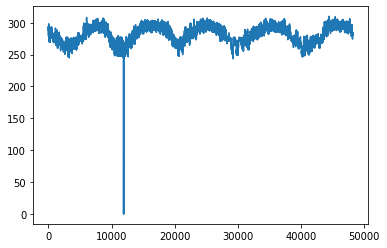

In [3]:
data['temp'].plot()

На этом графике по оси X у нас индексы или номер строк DataFrame, а по оси Y - значения колонки "temp" (температура в Келвинах).
Для начала, давайте изменим размер графика, чтобы было удобнее его читать. Делатеся это с помощью параметра figsize, в который нужно передать длинну и высоту окна.

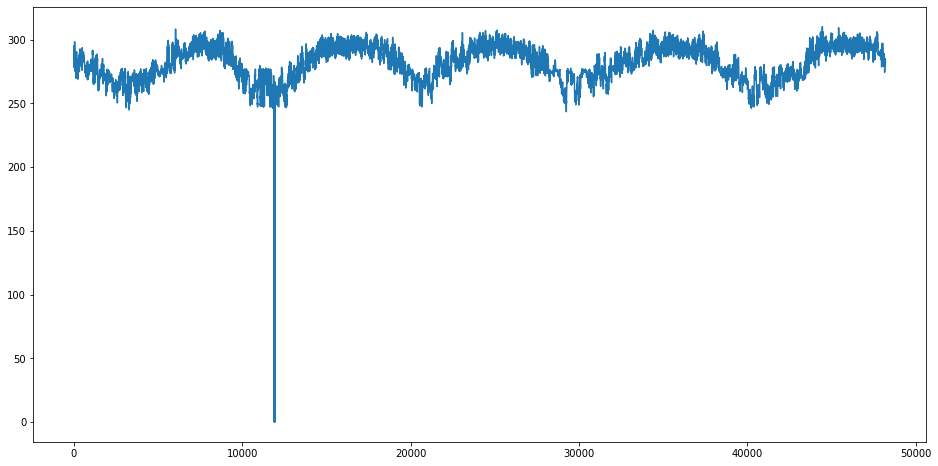

In [4]:
data['temp'].plot(figsize=(16, 8))

Какую полезную информацию можно извлечь из этого графика? Во-первых, видно, что есть какая-то закономерность в изменении температуры. Если предположить, что индексы соответсвуют упорядоченному возрастанию даты и времени, то мы получим явновыраженную сезонность в графике.
Во-вторых - есть аномальное снижение температуры до 0. Поскольку температура, в данном случае, измеряется в Кельвинах, то это означет, что в какой-то промежуток времени температура на на улице упала до абсолютного нуля (-273,15 градусов Цельсия). Поскольку, это крайне маловероятно, то можно сделать вывод, что эти данные в талбице ошибочны. Если бы мы хотеле исползовать эти данные для обучения какого-нибудь алгоритма машинного обучения, то мы могли бы просто заменить эти нули, на среднее значениее температуры в тот же сезон, но из другого периода. 
Вот так просто с помощью визуализации можно отловить ошибки или аномалии в данных.

Давайте посмотрим на другие типы графиков. Посчитаем сколько и каких типов погоды встречаются в нашей таблице.

In [5]:
data['weather_main'].value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

Для отображения такого рода информации лучше всего использовать, Barpolt. Давайте это и сделаем.

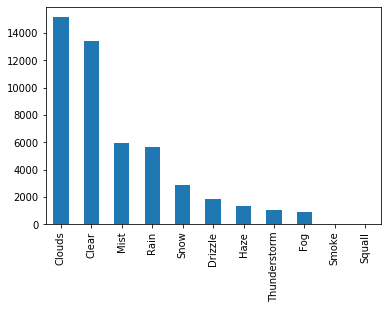

In [6]:
data['weather_main'].value_counts().plot(kind='bar')

Всё, что мы сделали - это передали ключевое слово 'bar' (тип графика) в параметр kind. Нежи приведён основной списко типов графиков в Pandas, доступный в данный момент:
    
  * 'bar' - вертикальный bar plot;
  * 'barh' - горизонтальный bar plot;
  * 'hist' : гистрограмма распределения выбранной велечины;
  * 'box' : boxplot или ящик с усами;
  * 'kde' или 'density' : графики плотности распредления некоторой величины (пока он нам не особо нужен);
  * 'area' : закрашывает грфики под кривой (по-сути график площади);
  * 'pie' : всеми любимый график-пирог или круговая диаграмма;
  * 'scatter' : отображает зависимость одной величины от другой;
  * 'hexbin' : навороченный scatter.
  
Давайте попробуем построить каждый из них. Для начала попробуем построить горизонтальный бар плот (ключевое слово 'barh') и для
лучшей читабельности увеличим размер окна графика.

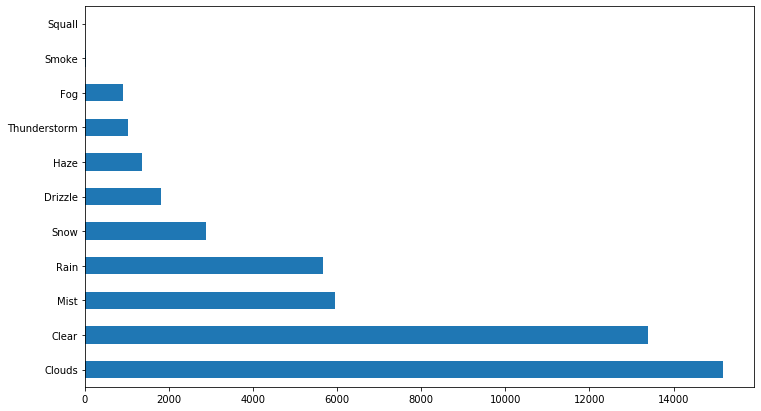

In [7]:
data['weather_main'].value_counts().plot(kind='barh', figsize=(12, 7))

Теперь давайте посмотрим, как распределеются значения колонки "traffic_voliume", т.е. построим гистограмму распределения (ключевое слово 'hist').

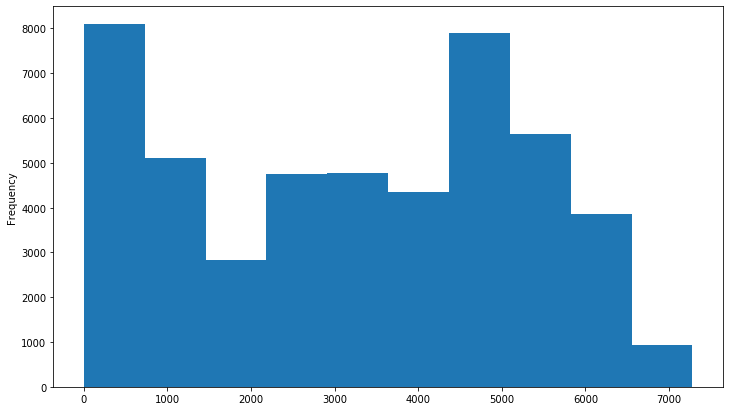

In [12]:
data['traffic_volume'].plot(kind='hist', figsize=(12, 7))

Мда. Получилось не очень информативно, т.к данные разбиты на слишком крупные секциии или группы (на графике их 10). То есть, каждая группа или прямоугольник содержит информацию  примерно 4820 наблюдений (48204 разделить на 10). Но у графика гистограмма есть такой параметр как "bins", который отвечает за количество групп. Давайте передадим его в качестве аргумента в метод plot() и установим значение равное 200.

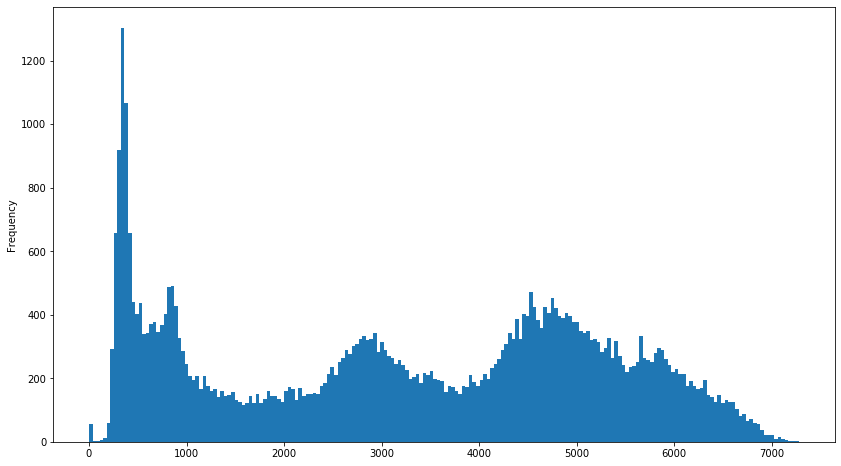

In [30]:
data['traffic_volume'].plot(kind='hist', bins=200, figsize=(14, 8))

Неправдали, совсем другая картина. Теперь у нас только один явновыраженный пик и мы уверенно можем сказать что распределение этой велечины далеко от нормального распределения.

Посмотрим на те же самые данные но уже на графике бокс-плот.

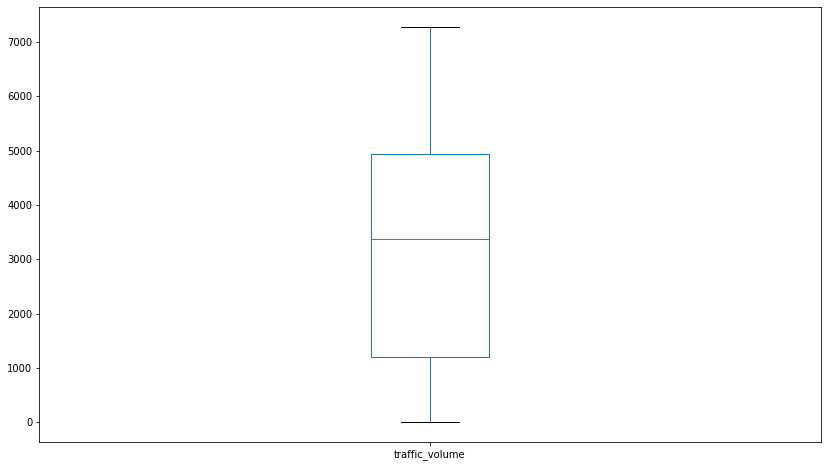

In [31]:
data['traffic_volume'].plot(kind='box', figsize=(14, 8))

Чем полезен график бокс-плот, как его читать и какую информацию о данных можно извлечть с помощьюу этого графика объясняеться в курсе "Основы статистики".

#Но хочу сразу отметить, что часто бывает полезно построить бокс-полты не для одной велечины, а для сгруппированных велечин #одного параметра. Давайте сгруппируем данные по колонке "weather_main" и построим боксплот для каждой группы.


to be continued...